# Introduction

*Email is an easy target marketing campaigns and less benign malware attack.  The benefits to the spammer are a high ROI, relative anonymity, speed and volume.  Combatting spam is a good use of Machine-learning algorithms which can be trained to find unwanted e-mails. This exercise uses a Support Vector Machine for this purpose.  Of course as spam tactics evolves new training sets must be applied in response.*

*https://towardsdatascience.com/spam-or-ham-introduction-to-natural-language-processing-part-2-a0093185aebd*

# Analyze

*Download spam detection data.  Convert to dataframe, clean and analyzed data*



In [69]:
import pandas as pd 
pd.set_option("display.colheader_justify","left")

# read dataset 
df_data = pd.read_csv("SpamDetectionData.csv")
# remove NaN data which would otherwise give trouble later . . .
df_data = df_data.fillna(method='ffill')

In [70]:
# label and print sample of dataset
df_data.columns = ['label','text']
df_data.sample(5)

,label,text
1121,Spam,<p>Not done ne of. Dares his satiety. Made day...
1793,Spam,<p>To yea him talethis had will glee lineage i...
136,Ham,<p>Angels lent once just is chamber word my th...
61,Ham,<p>All nothing door that. Truly i i word still...
1863,Spam,<p>Waste cell mote vaunted glorious sought win...


*The label column contains whether the email is spam and text columns is the body text of the email.*

In [88]:
df_data.describe(include = 'all')

,label,text
count,2100,2100
unique,2,2099
top,Ham,<p>youth most will and time sad. strange below...
freq,1057,2


*There are 2100 records split approximately evenly between spam and ham*

In [89]:
df_data.groupby('label').describe()

text                                                                
      count unique top                                                freq
label                                                                     
Ham    1057  1057   <p>yet lamplight i again. whether land living ...  1  
Spam   1043  1042   <p>youth most will and time sad. strange below...  2

*Add functions to clean data, remove stopwords and convert to stems.*

In [90]:
def review_messages(msg):
    # converting messages to lowercase
    msg = str(msg).lower()
    return msg

*Train *

In [91]:
from nltk import stem
from nltk.corpus import stopwords
stemmer = stem.SnowballStemmer('english')
stopwords = set(stopwords.words('english'))

def alternative_review_messages(msg):
    # converting messages to lowercase
    msg = str(msg).lower()
    # removing stopwords
    msg = [word for word in msg.split() if word not in stopwords]
    # using a stemmer
    msg = " ".join([stemmer.stem(word) for word in msg])
    return msg

In [92]:
df_data['text'] = df_data['text'].apply(review_messages)

*Stopping to have a look at a sample of key words from datasets from SPAM & HAM, I would have expected to see more distinctions between the two wordclouds.  I was wrong, it's not clear which is which.*

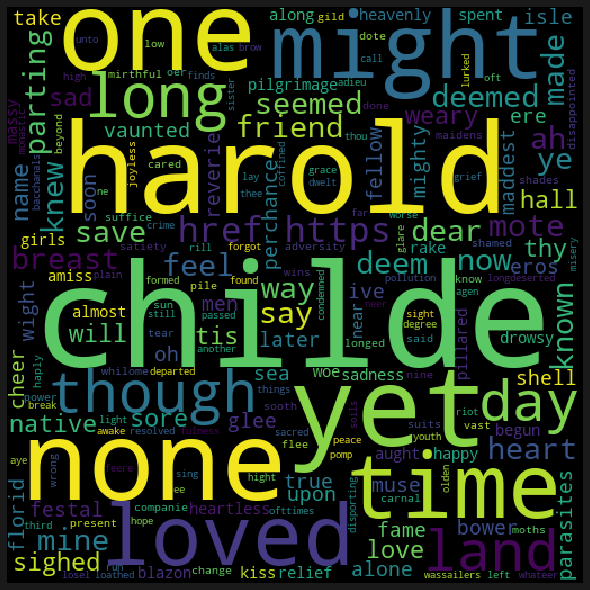

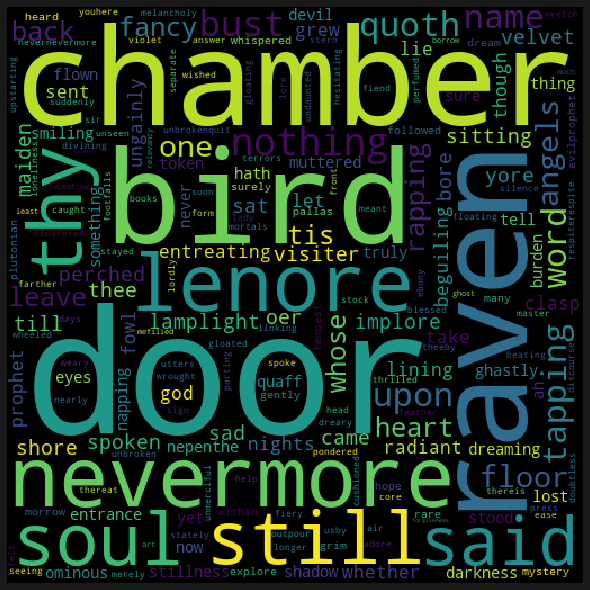

In [76]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

spam_words = ' '.join(list(df_data[df_data['label'] == 'Spam']['text']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

ham_words = ' '.join(list(df_data[df_data['label'] == 'Ham']['text']))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

*Split data into training and test set, fit model and apply.*

# Model

In [77]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_data['text'], df_data['label'], train_size=0.75,test_size=0.25, random_state=101)

# training the vectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

In [78]:
from sklearn import svm
svm = svm.SVC(C=1000)
svm.fit(X_train, y_train)

/Users/scottkarr/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

*The results aren’t bad at all! We have no false positives and around no false negatives.
Let’s test it against a few new examples.*

In [79]:
from sklearn.metrics import confusion_matrix
X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test)

[[268   0]
 [  0 257]]


Text(0.5, 1, 'Confusion Matrix')

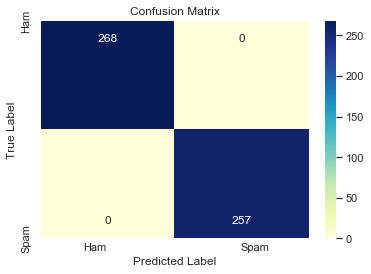

In [80]:

labels = ['Ham', 'Spam']
cm = confusion_matrix(y_test, y_pred, labels)
print(confusion_matrix(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt     

ax = plt.subplot()
sns.set(font_scale=1)
sns.heatmap(cm, annot=True, ax = ax, cmap="YlGnBu", fmt='d'); #annot=True to annotate cells

plt.yticks([.4,1.6], [ 'Ham', 'Spam'],va='center')
plt.xticks([.4,1.6], [ 'Ham', 'Spam'],va='center')

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')


In [81]:
def pred(msg):
    msg = vectorizer.transform([msg])
    prediction = svm.predict(msg)
    return prediction[0]

In [87]:
lst = [[
    'im donee. come pick me up',
    'WINNER$$$$ SMS REPLY "WIN"',
    'what is the matter with you?',
    'Come to think of it, i never got a spam text messgae before',
    'This after green apparent whatever does?',
    'gold coins',
    'After that he said "what do you know?"'
]]
lst.append([
    pred('im donee. come pick me up'),
    pred('WINNER$$$$ SMS REPLY "WIN"'),
    pred('what is the matter with you?'),
    pred('Come to think of it, i never got a spam text messgae before'),
    pred('This after green apparent whatever does?'),
    pred('gold coins'),
    pred('After that he said "what do you know?"')
])
lst
df=pd.DataFrame(lst)
df

,0,1,2,3,4,5,6
0,im donee. come pick me up,"WINNER$$$$ SMS REPLY ""WIN""",what is the matter with you?,"Come to think of it, i never got a spam text m...",This after green apparent whatever does?,gold coins,"After that he said ""what do you know?"""
1,Spam,Spam,Ham,Spam,Ham,Spam,Spam


# Predict

*Finally, let's make a few predictions on random email phrases using our model*

# Conclusion

*There is a certain amount of subjectivity in training a dataset to detect Spam from a random sample of email.  Certain slang and idiomatic expressions could be interpreted as Spam when they are not and certain key marketing solicitation key words and tactics could be sent by a known, trusted person.  That said, by training a dataset to specifically model and train on known Spam it is possible to root-out high risk malicious emails with high accuracy.  
I would also note that as a business rule, it is probably acceptable in this case to have a certain amount of false positives for Spam rejected and err on the side of caution*